实现以下二叉树，并进行先序，中序，后序，层次遍历

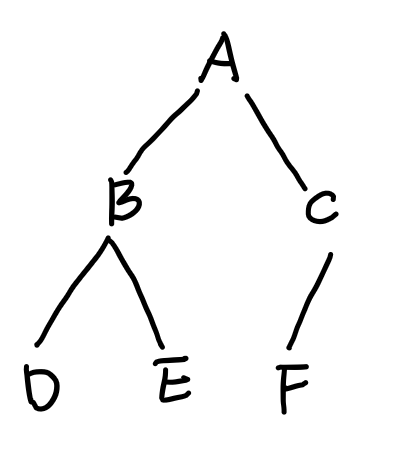


In [8]:
class BinaryTreeNode():
    def __init__(self, data=None, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right
        
class BinaryTree(object):
    def __init__(self, root=None):
        self.root = root

    def is_empty(self):
        return self.root == None

    # 前序
    def preOrder(self,BinaryTreeNode):
        
        if BinaryTreeNode == None: return       
        print(BinaryTreeNode.data)       
        self.preOrder(BinaryTreeNode.left)
        self.preOrder(BinaryTreeNode.right)
        
    def inOrder(self,BinaryTreeNode):
        if BinaryTreeNode == None: return       
 
        self.inOrder(BinaryTreeNode.left)
        print(BinaryTreeNode.data)      
        self.inOrder(BinaryTreeNode.right)

    def postOrder(self,BinaryTreeNode):
        if BinaryTreeNode == None: return       
  
        self.postOrder(BinaryTreeNode.left)
        self.postOrder(BinaryTreeNode.right)
        print(BinaryTreeNode.data)     

    ## 15 层次遍历
    def lookup(self, BinaryTreeNode):
        
        stack = [BinaryTreeNode]
        while stack:
            current = stack.pop(0)
            print(current.data)
            if current.left: stack.append(current.left)
            if current.right: stack.append(current.right)
            



        
n1 = BinaryTreeNode(data="D")
n2 = BinaryTreeNode(data="E")
n3 = BinaryTreeNode(data="F")
n4 = BinaryTreeNode(data="B", left=n1, right=n2)
n5 = BinaryTreeNode(data="C", left=n3)
root = BinaryTreeNode(data = 'A', left = n4, right = n5)

bt = BinaryTree(root)
print('先序遍历')
bt.preOrder(bt.root)
print('中序遍历')
bt.inOrder(bt.root)
print('后序遍历')
bt.postOrder(bt.root)
print('层次遍历')
bt.lookup(bt.root)

先序遍历
A
B
D
E
C
F
中序遍历
D
B
E
A
F
C
后序遍历
D
E
B
F
C
A
层次遍历
A
B
C
D
E
F


# 1. 黑红树

### 二叉查找树

由于红黑树本质上就是一棵二叉查找树，所以在了解红黑树之前，咱们先来看下二叉查找树。
二叉查找树（Binary Search Tree），也称有序二叉树（ordered binary tree）,排序二叉树（sorted binary tree），是指一棵空树或者具有下列性质的二叉树：

    若任意结点的左子树不空，则左子树上所有结点的值均小于它的根结点的值；
    若任意结点的右子树不空，则右子树上所有结点的值均大于它的根结点的值；
    任意结点的左、右子树也分别为二叉查找树。
    没有键值相等的结点（no duplicate nodes）。
    
因为，一棵由n个结点，随机构造的二叉查找树的高度为lgn，所以顺理成章，一般操作的执行时间为O（lgn）.

但二叉树若退化成了一棵具有n个结点的线性链后，则此些操作最坏情况运行时间为O（n）。后面我们会看到一种基于二叉查找树-红黑树，它通过一些性质使得树相对平衡，使得最终查找、插入、删除的时间复杂度最坏情况下依然为O（lgn）。

### 黑红树

前面我们已经说过，红黑树，本质上来说就是一棵二叉查找树，但它在二叉查找树的基础上增加了着色和相关的性质使得红黑树相对平衡，从而保证了红黑树的查找、插入、删除的时间复杂度最坏为O(log n)。

但它是如何保证一棵n个结点的红黑树的高度始终保持在h = logn的呢？这就引出了红黑树的5条性质：

    1）每个结点要么是红的，要么是黑的。  
    2）根结点是黑的。  
    3）每个叶结点（叶结点即指树尾端NIL指针或NULL结点）是黑的。  
    4）如果一个结点是红的，那么它的俩个儿子都是黑的。  
    5）对于任一结点而言，其到叶结点树尾端NIL指针的每一条路径都包含相同数目的黑结点。

正是红黑树的这5条性质，使得一棵n个结点是红黑树始终保持了logn的高度，从而也就解释了上面我们所说的“红黑树的查找、插入、删除的时间复杂度最坏为O(log n)”这一结论的原因。

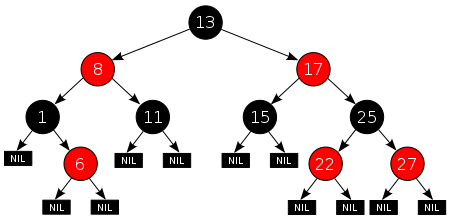

上文中我们所说的 "叶结点" 或"NULL结点"，它不包含数据而只充当树在此结束的指示，这些结点以及它们的父结点，在绘图中都会经常被省略。

### 树的旋转知识


红黑树在INSERT和DELETE的过程中，会使用到旋转操作。

红黑树有两种旋转：左旋和右旋

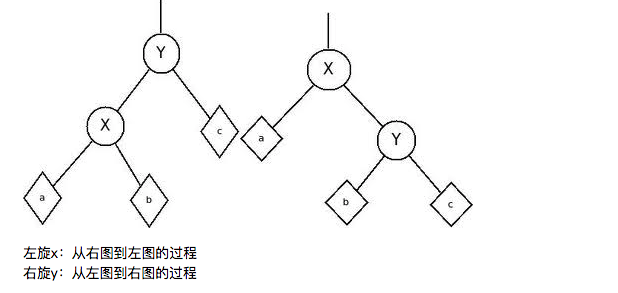

    1.并非每个节点在INSERT或DELETE的过程中都需要旋转操作
    2.左旋就是右儿子y取代父节点x，x作为y的做儿子，y原来的左儿子b成为x现在的右儿子
    3.右旋就是左旋的逆向过程

### 红黑树的插入

INSERT一个值的过程，就是在二叉查找树的INSERT操作基础上，根据红黑树性质做必要的调整，比如颜色变化，比如旋转，也就是INSERT_FIXUP的过程

插入的节点一般设定为红色然后再调整

### 红黑树的删除

# 2. B树

# 3. 最近公共祖先LCA 

In [12]:
class TreeNode:    
    def __init__(self, val):        
        self.val = val        
        self.left, self.right = None, None  
        
class Solution:    
    """       
    @param: root: The root of the binary search tree.       
    @param: A: A TreeNode in a Binary.       
    @param: B: A TreeNode in a Binary.       
    @return: Return the least common ancestor(LCA) of the two nodes.  
    """     
    def lowestCommonAncestor(self, root, A, B):        
        # A&B=>LCA        
        # !A&!B=>None        
        # A&!B=>A        
        # B&!A=>B   
        
        #若root为空或者root为A或者root为B，说明找到了A和B其中一个   
        if(root is None or root==A or root==B):            
            return root        
     
        left=self.lowestCommonAncestor(root.left,A,B)        
        right=self.lowestCommonAncestor(root.right,A,B)
        
        #若左子树找到了A，右子树找到了B，说明此时的root就是公共祖先           
        if(left is not None and right is not None):            
            return root      
          
        #若左子树是none右子树不是，说明右子树找到了A或B       
        if(left is None): return right  
        
        #同理  
        if(right is None): return left        
        return None   
    
a=Tree = TreeNode(2)
b=Tree.left = TreeNode(1)
c=Tree.right = TreeNode(3)
d=b.left=TreeNode(4)
s = Solution()
print(s.lowestCommonAncestor(a,b,c).val)



2


##### 二叉搜索树的最近公共祖先（leetcode 235， 236）

#### 解法1

当作普通二叉树，用递归的方法求解

In [13]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root, p, q):
        """
        :type root: TreeNode
        :type p: TreeNode
        :type q: TreeNode
        :rtype: TreeNode
        """
        
        if root == None or root == p or root == q:
            return root
        
        left = self.lowestCommonAncestor(root.left, p, q)
        right = self.lowestCommonAncestor(root.right, p, q)
        
        if left is not None and right is not None:
            return root
        if left is None: return right 
        if right is None: return left
        return None
            
        

#### 解法2

In [14]:
class Solution:
    def lowestCommonAncestor(self, root, p, q):
        """
        :type root: TreeNode
        :type p: TreeNode
        :type q: TreeNode
        :rtype: TreeNode
        """
        

        if root == None: return None
        if min(p.val, q.val)<=root.val<=max(p.val, q.val): 
            return root
        else:
            l = self.lowestCommonAncestor(root.left, p, q)
            r = self.lowestCommonAncestor(root.right, p, q)
            if l:return l
            if r:return r

# 堆排序

堆排序是利用堆这种数据结构而设计的一种排序算法，堆排序是一种选择排序，它的最坏，最好，平均时间复杂度均为O(nlogn)，它也是不稳定排序。首先简单了解下堆结构。

堆是具有以下性质的完全二叉树：每个结点的值都大于或等于其左右孩子结点的值，称为大顶堆；或者每个结点的值都小于或等于其左右孩子结点的值，称为小顶堆。如下图：

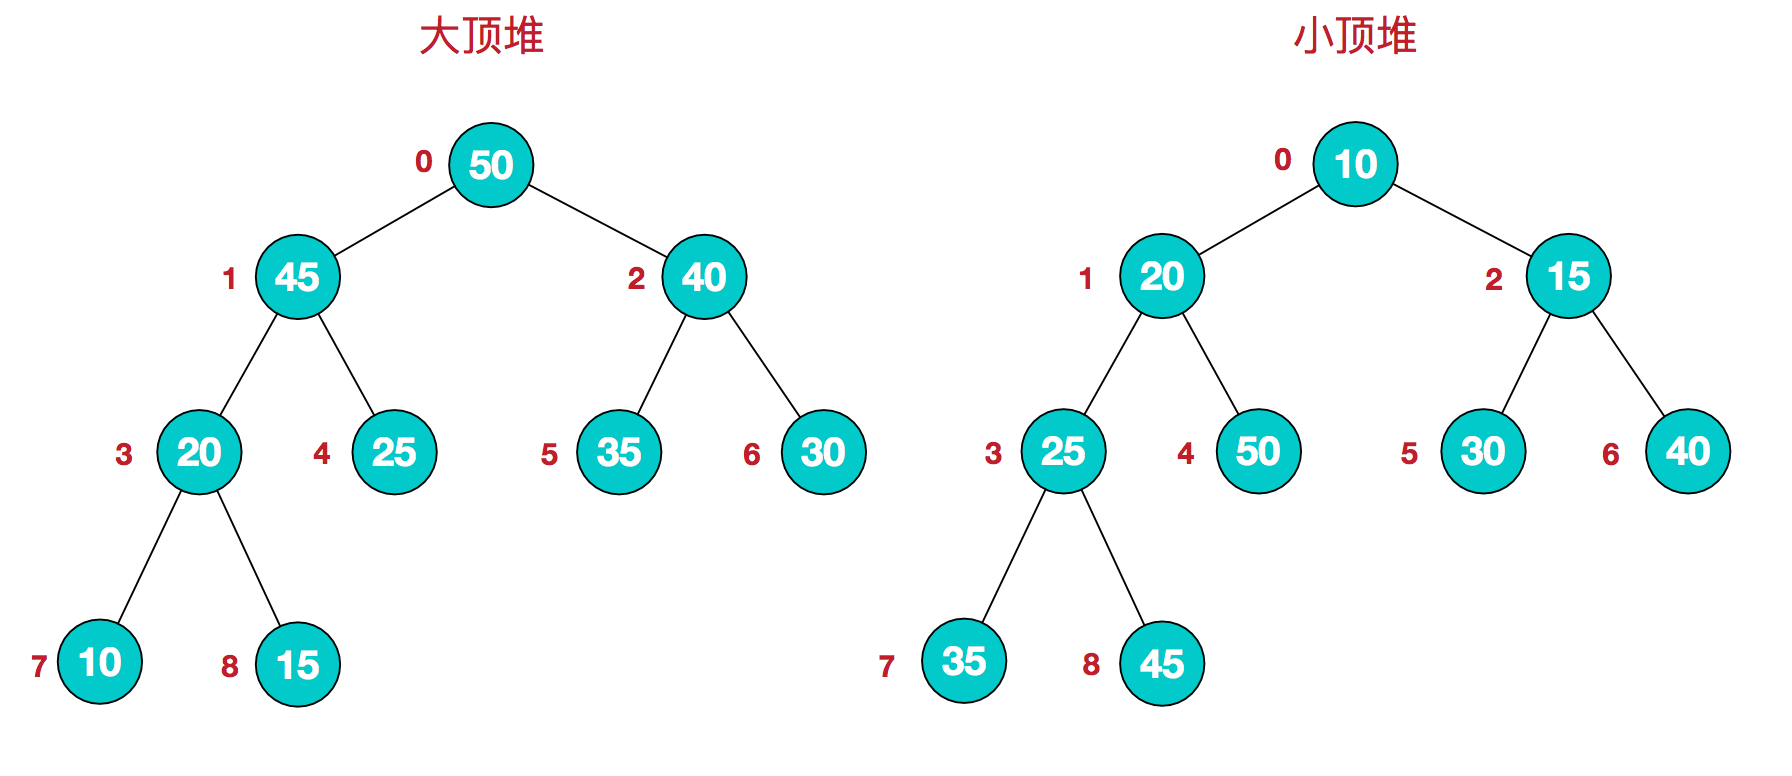



同时，我们对堆中的结点按层进行编号，将这种逻辑结构映射到数组中就是下面这个样子

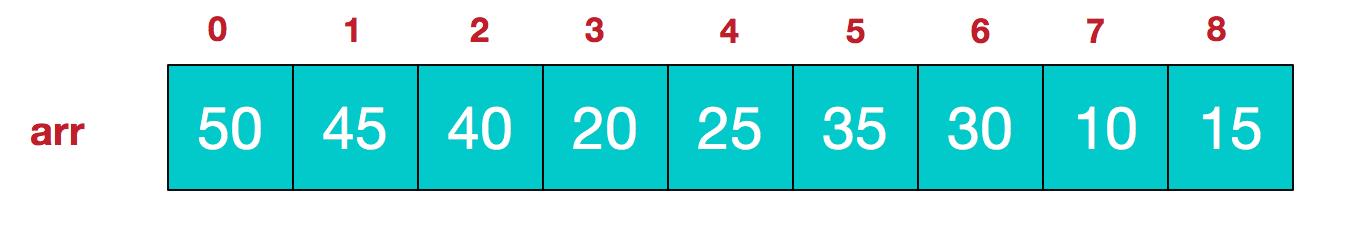

该数组从逻辑上讲就是一个堆结构，我们用简单的公式来描述一下堆的定义就是：

    大顶堆：arr[i] >= arr[2i+1] && arr[i] >= arr[2i+2]  

    小顶堆：arr[i] <= arr[2i+1] && arr[i] <= arr[2i+2]  

In [23]:
import random

def MAX_Heapify(heap,HeapSize,root):#在堆中做结构调整使得父节点的值大于子节点

    left = 2*root + 1
    right = left + 1
    larger = root
    if left < HeapSize and heap[larger] < heap[left]:
        larger = left
    if right < HeapSize and heap[larger] < heap[right]:
        larger = right
    #如果做了堆调整则larger的值等于左节点或者右节点的，这个时候做对调值操作
    if larger != root:
        heap[larger],heap[root] = heap[root],heap[larger]
        MAX_Heapify(heap, HeapSize, larger)

#构造一个堆，将堆中所有数据重新排序
def Build_MAX_Heap(heap):
    HeapSize = len(heap)#将堆的长度当独拿出来方便
    for i in range((HeapSize -2)//2,-1,-1):#从后往前出数
        MAX_Heapify(heap,HeapSize,i)

#将根节点取出与最后一位做对调，对前面len-1个节点继续进行对调整过程。
def HeapSort(heap):
    Build_MAX_Heap(heap)
    for i in range(len(heap)-1,-1,-1):
        heap[0],heap[i] = heap[i],heap[0]
        MAX_Heapify(heap, i, 0)
    return heap

if __name__ == '__main__':
    a = [30,50,57,77,62,78,94,80,84]
    print(a)
    HeapSort(a)
    print(a)
#     b = [random.randint(1,1000) for i in range(1000)]
#     print(b)
#     HeapSort(b)
#     print(b)


[30, 50, 57, 77, 62, 78, 94, 80, 84]
[30, 50, 57, 62, 77, 78, 80, 84, 94]


In [25]:
5//2

2